In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>Read Data</h3>

This section reads data from the provided .csv file which has the ratings provided by different users for differnt products. This file was provided in the problem

Apart from this file, the site mentioned about metadata, but seems like metadata information is not available in the website, but we have to email to get the informatio about the same. It would have been useful to have this info so that we can take a look at the product title and derive some information. 

On the other hand, review information along with ASIN is made available in the website. But the basic assumption here is to assume to have only the user, product and ratings

In [2]:
re_df = pd.read_csv('ratings_Electronics.csv',names=['user_id','product_id','rating','timestamp'])
re_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


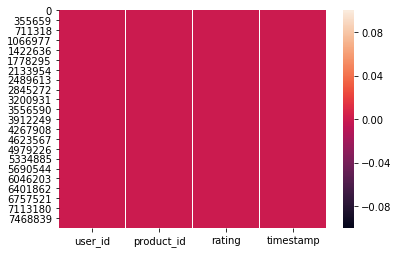

In [4]:
sns.heatmap(re_df.isnull())

In [5]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Electronics_5.json.gz')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
reviewerID        1689188 non-null object
asin              1689188 non-null object
reviewerName      1664458 non-null object
helpful           1689188 non-null object
reviewText        1689188 non-null object
overall           1689188 non-null float64
summary           1689188 non-null object
unixReviewTime    1689188 non-null int64
reviewTime        1689188 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 128.9+ MB


In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [8]:
##df.to_csv('reviews.csv')

In [9]:
re_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
df.isnull().any()

reviewerID        False
asin              False
reviewerName       True
helpful           False
reviewText        False
overall           False
summary           False
unixReviewTime    False
reviewTime        False
dtype: bool

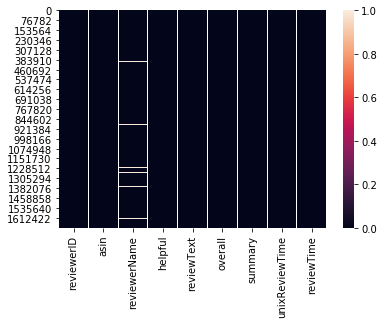

In [11]:
sns.heatmap(df.isnull())

<h3>Dataset exploration and characteristics</h3>

Dataset has the ratings given by different users for different products. In general, this dataset consists of more representation from customers who have given high ratings. Customers who have given low ratings have very low representation

Also, when the products are grouped and their mean rating is obtained. It is found that the mean ratings are high for products which have been rated just once. This cannot be right as just one rating is not suffice to reflect the rating of the product

Also, from the joint plot, it is evident that high average mean rated products have more number of reviews as well


<h4>Unique users and products</h4>

In [12]:
print('unique users in the dataset is ', np.count_nonzero(re_df['user_id'].unique()))
print('unique products in the dataset is ', np.count_nonzero(re_df['product_id'].unique()))

unique users in the dataset is  4201696
unique products in the dataset is  476002


<h4>Ratings Countplot</h4>

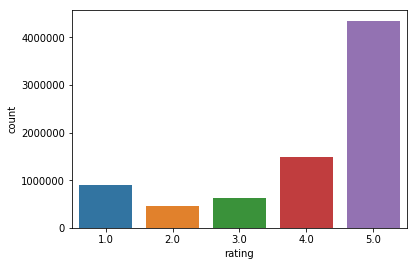

In [13]:
sns.countplot(re_df['rating'])

<h4>Reasoning of meanRating with count of reviews for products</h4>

As we can see here, product_id = '0132793040' has a mean rating of 5.0, but it is just reviewed by one user in the dataset
product_id = 'B0074BW614' has max number of reviews (18244), but its mean rating is 4.49

This doesn't mean that product_id = '0132793040' is better than 'B0074BW614' as B0074BW614 is reviewed by lot many users than 0132793040

In [14]:
re_df.groupby(by='product_id').mean().sort_values(by='rating',ascending=False).head()

,rating,timestamp
product_id,,
0132793040,5.0,1.365811e+09
B004SGH244,5.0,1.372637e+09
B004SQBRRM,5.0,1.312675e+09
B004SQC6O0,5.0,1.374624e+09
B004SQE6YI,5.0,1.309392e+09


In [15]:
re_df[re_df['product_id']=='0132793040']

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200


In [16]:
re_df.groupby('product_id').count().sort_values(by='user_id',ascending=False).head()

,user_id,rating,timestamp
product_id,,,
B0074BW614,18244,18244,18244
B00DR0PDNE,16454,16454,16454
B007WTAJTO,14172,14172,14172
B0019EHU8G,12285,12285,12285
B006GWO5WK,12226,12226,12226


<h4>Analysis of meanRating and count of reviews for product </h4>

Form a dataframe with meanRating and count of reviews for each product and analyse the same

In [17]:
meanRating = re_df.groupby('product_id').mean()['rating']
meanRating.head()

product_id
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: rating, dtype: float64

In [18]:
ratingCount = re_df.groupby('product_id').count()['rating']
ratingCount.head()

product_id
0132793040     1
0321732944     1
0439886341     3
0511189877     6
0528881469    27
Name: rating, dtype: int64

In [19]:
product_rating = pd.DataFrame(data={'meanRating':meanRating,'count':ratingCount})
product_rating.sort_values(by='count',ascending=False).head()

,meanRating,count
product_id,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


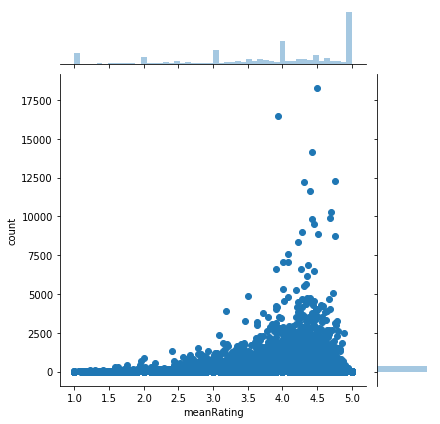

In [20]:
sns.jointplot(product_rating['meanRating'],product_rating['count'])

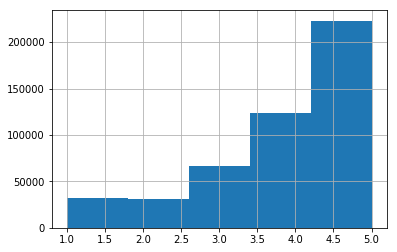

In [21]:
product_rating['meanRating'].hist(bins=5)

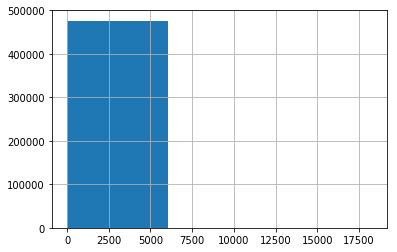

In [22]:
product_rating['count'].hist(bins=3)

<h3>Filter users who have given 50+ ratings</h3>

Unique users in the dataset who has given ratings is around 42 lakhs. Filtering users who have given 50+ reviews for amazon products. After filtering, the number of users who have given 50+ ratings is 1540. Extract only the product reviews given by these 1540 users into a new dataframe

So, after filtering

Number of total reviews in the the dataset has been reduced from 7824K reviews to 125K reviews

Number of unique users in the dataset has been reduced from 4201K to 1.5K 

Number of unique products in the dataset has been reduced from 476K to 48K

In [23]:
re_df_userId = re_df.groupby(by='user_id').count()
re_df_userId.head()

,product_id,rating,timestamp
user_id,,,
A00000262KYZUE4J55XGL,1,1,1
A000063614T1OE0BUSKUT,2,2,2
A00009182QVLSWIGHLS1B,1,1,1
A00009661LC9LQPGKJ24G,1,1,1
A00010809P09NUU6ZP6H,1,1,1


In [24]:
re_df_userId50 = re_df_userId[re_df_userId['rating'] >= 50]
re_df_userId50.head()

,product_id,rating,timestamp
user_id,,,
A100UD67AHFODS,116,116,116
A100WO06OQR8BQ,132,132,132
A105S56ODHGJEK,68,68,68
A105TOJ6LTVMBG,71,71,71
A10AFVU66A79Y1,65,65,65


In [25]:
re_df_userId50.sort_values(by='rating',ascending=False).head()

,product_id,rating,timestamp
user_id,,,
A5JLAU2ARJ0BO,520,520,520
ADLVFFE4VBT8,501,501,501
A3OXHLG6DIBRW8,498,498,498
A6FIAB28IS79,431,431,431
A680RUE1FDO8B,406,406,406


In [26]:
re_df_userId50.sort_values(by='rating',ascending=False).describe()

,product_id,rating,timestamp
count,1540.000000,1540.000000,1540.000000
mean,81.734416,81.734416,81.734416
std,46.340509,46.340509,46.340509
min,50.000000,50.000000,50.000000
25%,56.000000,56.000000,56.000000
50%,66.000000,66.000000,66.000000
75%,89.000000,89.000000,89.000000
max,520.000000,520.000000,520.000000


In [27]:
re_df_users50 = pd.DataFrame(re_df_userId50.index)
re_df_users50.head()

,user_id
0,A100UD67AHFODS
1,A100WO06OQR8BQ
2,A105S56ODHGJEK
3,A105TOJ6LTVMBG
4,A10AFVU66A79Y1


In [28]:
reviews_df = re_df[re_df['user_id'].isin(re_df_users50['user_id'])]
reviews_df.head()

,user_id,product_id,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [29]:
reviews_df.groupby(by='user_id').count().sort_values(by='rating',ascending=False).head()

,product_id,rating,timestamp
user_id,,,
A5JLAU2ARJ0BO,520,520,520
ADLVFFE4VBT8,501,501,501
A3OXHLG6DIBRW8,498,498,498
A6FIAB28IS79,431,431,431
A680RUE1FDO8B,406,406,406


In [30]:
reviews_df.describe()

,rating,timestamp
count,125871.000000,1.258710e+05
mean,4.261339,1.321979e+09
std,1.062144,7.583599e+07
min,1.000000,9.396000e+08
25%,4.000000,1.286928e+09
50%,5.000000,1.346717e+09
75%,5.000000,1.377130e+09
max,5.000000,1.406074e+09


In [31]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
user_id       125871 non-null object
product_id    125871 non-null object
rating        125871 non-null float64
timestamp     125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [32]:
print('number of unique users in the filtered dataset is ', np.count_nonzero(reviews_df['user_id'].unique()))
print('number of unique products in the filtered dataset is ', np.count_nonzero(reviews_df['product_id'].unique()))

number of unique users in the filtered dataset is  1540
number of unique products in the filtered dataset is  48190


<h3>Split data into training and test</h3>

Train-Test split is done to evaluate the recommender system. Train-Test split can be done in one of the following modes

    1) Random test-train split of the dataset

    2) Chronological ordering by timestamp and consider first 70% as train and rest 30% as test. This evaluates whether the system is able to recommend future

    3) Have equal number of users in train and test set

Here below, we have gone with approach#2. If time permits, we can try with approach #1 and approach #3 as well

The final check ensures that test set does not have any data that is greater than max timestamp in the train set

In [33]:
from sklearn.model_selection import train_test_split
reviews_df.sort_values(by='timestamp',ascending=True,inplace=True)
train_index = int(reviews_df.shape[0]*0.7)
train_index

C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


88109

In [34]:
X_train = reviews_df[0:train_index]
X_test = reviews_df[train_index:]

In [35]:
print(X_train.shape)
print(X_test.shape)

(88109, 4)
(37762, 4)


In [36]:
X_train['timestamp'].max()

1370908800

In [37]:
X_test[X_test['timestamp'] < X_train['timestamp'].max()]

,user_id,product_id,rating,timestamp


<h3>Popularity Recommender model</h3>

In [38]:
def popularModel():
    return re_df.sort_values(by='rating', ascending=False).head(10)

In [39]:
def trainPopularRecommendModel(train_data):
    return train_data.sort_values(by='rating', ascending=False)

In [40]:
def recommendPopularModel(trainedData, userId, k):
    boughtProducts = trainedData[trainedData['user_id']==userId]['product_id']
    ##print(boughtProducts)
    productsNotRatedByUser = ~trainedData['product_id'].isin(boughtProducts)
    ##print(productsNotRatedByUser)
    trainedData[productsNotRatedByUser]
    ##.sort_values(by='rating',ascending=False, inplace=True)
    return trainedData

In [41]:
popularProducts = popularModel()
popularProducts

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
4517539,A24TMZNTFUY7HC,B004W26IVC,5.0,1366761600
4517551,A39DCWST8TYG5A,B004W29GIE,5.0,1353715200
4517550,A3MCP1Y87DJFL7,B004W29GIE,5.0,1374192000
4517547,A2SEOS4OSHYO3W,B004W29EYU,5.0,1358985600
4517545,A2M8701Z3T8G0L,B004W29CRO,5.0,1389571200
4517544,A1ZT3I76VJS9JU,B004W26IVC,5.0,1355702400
4517542,A398JEIY86GXTX,B004W26IVC,5.0,1356652800
4517541,A36VH1ENB59YMI,B004W26IVC,5.0,1320624000
4517540,A2H3HM1BCPIVGE,B004W26IVC,5.0,1335830400


In [42]:
def recommendPopularProducts(trainData,userId):
    trained_data = trainPopularRecommendModel(trainData)
    trained_data
    popularProducts = recommendPopularModel(trained_data,userId,5)
    meanRating = popularProducts.groupby(by='product_id').mean()['rating']
    ratingCount = popularProducts.groupby(by='product_id').count()['rating']
    returnDf = pd.DataFrame(data={'meanRating':meanRating,'ratingCounts':ratingCount}).sort_values(by=['ratingCounts','meanRating'], ascending=False)
    return returnDf

In [43]:
recommendPopularProducts(X_train,'A3IOQ7NVVLAUEE').head()

,meanRating,ratingCounts
product_id,,
B0088CJT4U,4.214286,196
B00829TIEK,4.432432,148
B002R5AM7C,4.125000,128
B003ES5ZUU,4.862903,124
B00829THK0,4.446281,121


In [44]:
X_test.head()

,user_id,product_id,rating,timestamp
1012992,A3IOQ7NVVLAUEE,B000HVHYJW,3.0,1370908800
6300752,A3S5WYWYKSAI9C,B008N0ATDW,3.0,1370908800
6300783,A1YVO5V1SO18DZ,B008N0ATDW,5.0,1370908800
1968800,A1Q5P5ML3176C0,B001ELQTTA,4.0,1370908800
1220805,A3IOQ7NVVLAUEE,B000NPZ4D0,5.0,1370908800


In [51]:
X_test[X_test['user_id']=='A3IOQ7NVVLAUEE']['product_id'][~X_test[X_test['user_id']=='A3IOQ7NVVLAUEE']['product_id'].isin(recommendPopularProducts(X_train,'A3IOQ7NVVLAUEE').index)]

1220805    B000NPZ4D0
6899993    B00AI41RCS
4912769    B005FPT5YW
6777643    B009Y3AXQU
6535812    B0098FSJ92
5240034    B005Z1QJH2
5724584    B007EVKIXW
6438637    B0091158A6
1083893    B000JK7FMW
3751321    B0040JHMHQ
3919375    B004713JLU
4639226    B0051SVVX6
6962170    B00AVSSKLW
3629297    B003WC9HM0
5076031    B005LTU6VI
2118794    B001LF40KE
5717588    B007D6UT7I
7225718    B00C99MUHQ
6691086    B009QGAFPY
7163559    B00BSL8H32
1953396    B001E4UQM8
Name: product_id, dtype: object

In [ ]:
popularProducts.

<h3>Collabarative Filtering</h3>

In [16]:
def userProducts(userId):
    user_products = re_df[re_df['user_id'] == userId]['product_id']
    return user_products

def productUsers(productId):
    product_users = re_df[re_df['product_id'] == productId]['user_id']
    return product_users

def allUniqueProducts():
    uniqueProducts = re_df['product_id'].unique()
    return uniqueProducts

def recommendCollab(userId):
    user_products = userProducts(userId)
    unique_products = allUniqueProducts()
    print('length of unique products - ',len(unique_products))
    print('length of products bought by user - ',userId,' - ',len(user_products))
    concurrence_matrix = np.matrix(np.zeros(shape=(len(user_products),len(unique_products))),float)
    
    for i in np.arange(0,len(user_products)):
        uniqueUsersForProducti = productUsers(user_products.values[i])
        for j in np.arange(0,len(unique_products)):
            uniqueUsersForProductj = productUsers(unique_products[j])
            print(uniqueUsersForProductj)
            inter = set(uniqueUsersForProductj).intersection(set(uniqueUsersForProducti))
            union = set(uniqueUsersForProductj).union(set(uniqueUsersForProducti))
            print('i is ',i,' and j is ',j)
            concurrence_matrix[i,j] = float(len(inter)/len(union))
    user_sim_scores = concurrence_matrix.sum(axis=0)/concurrence_matrix.shape[0]
    us_pd = pd.DataFrame(np.array(user_sim_scores)).T
    indexValues = us_pd[us_pd != 0.000].dropna().sort_values(by=0,ascending=False).index.values  
    recommendProduct=[]
    for i in indexValues:
        recommendProduct.append(user_products.iloc[:][i:i+1].values[0])
        return recommendProduct.head()

In [17]:
user_products = userProducts('A5JLAU2ARJ0BO')
user_products.head()

2162     1400532655
32736    B00003006R
35087    B00003G1RG
38345    B00004S9AK
40411    B00004SB92
Name: product_id, dtype: object

In [18]:
product_users = productUsers('B004W1QRBO')
print(product_users)

4517526     AN9SBEIYZCSOB
4517527    A30KYZ6179J62B
Name: user_id, dtype: object


In [19]:
unique_products = allUniqueProducts()
print(unique_products)

['0132793040' '0321732944' '0439886341' ... 'BT008T2BGK' 'BT008UKTMW'
 'BT008V9J9U']


In [20]:
concurrence_matrix = np.matrix(np.zeros(shape=(len(user_products),len(unique_products))),float)

In [ ]:
for i in np.arange(0,len(user_products)):
    uniqueUsersForProducti = productUsers(user_products.values[i])
    print(uniqueUsersForProducti)
    for j in np.arange(0,len(unique_products)):
        uniqueUsersForProductj = productUsers(unique_products[j])
        print(uniqueUsersForProductj)
        inter = set(uniqueUsersForProductj).intersection(set(uniqueUsersForProducti))
        union = set(uniqueUsersForProductj).union(set(uniqueUsersForProducti))
        concurrence_matrix[i,j] = float(len(inter)/len(union))
        

2007    A3JZ898Q8XXL6K
2008    A23C0R77ZP9Z84
2009    A2JX7RNVFSR4BN
2010    A1QHBPGJJB3X4F
2011    A2BGSZL3EOJNC7
2012    A1FNHDWSN2KA0G
2013    A32UXBKVKAVCS5
2014    A3GKPMZ5O4Q9EV
2015     AA2SVPVU0LQTK
2016    A2QV5RB6AZRN4Y
2017    A2DN4ZHLUD49U0
2018    A39MGAXU3UNELM
2019    A16LWC9033XR7W
2020    A3UE9E2TQ7F912
2021    A2RFNIOYR9YO69
2022    A3C3YEFSJ78TLV
2023    A2ZSUW1XCR02YY
2024    A37E5KVAKOZFVS
2025     AGCH14JUICTCM
2026     AB7FYKO0TTDNA
2027    A2H89CYOQT1RMI
2028    A2EPLR3QULKLBB
2029    A39IV23M6S8YAK
2030    A2WFBRX9R0D84U
2031    A2YJ13OQZ6ZI5W
2032    A2OT6EBBZ0HKW1
2033    A3ROMM3ZX53UHA
2034    A154Q8G3EXQ0Y0
2035    A1YOR46K73484L
2036    A1E596DNI14490
             ...      
2461    A1O9EKXQURBME6
2462    A2YJXTEPUSGB0K
2463    A37FW6N1JEBRFM
2464    A29LNVZLBG0IYN
2465    A36EGPFMLL3HQA
2466    A17UHDV2O651YM
2467    A29517HU8CW0RI
2468     ARIZ46PEETTHV
2469      AP4VC5YW70CO
2470     ANDFQ67GG170I
2471    A2SFVAJTL8V4UB
2472     AVUNRKUQW1I55
2473     AW

1257    A1AKK3KAHTVYGL
1258    A23T8X4976NYKT
1259    A1G91CYPQP31B8
Name: user_id, dtype: object
1260    A204OUFELNGY5T
Name: user_id, dtype: object
1261     AALPZUTUR6HO2
1262    A3HG5694OIYC7Q
1263     AILZCBVMP5KNA
1264    A1ORYDJYMM5TI2
1265    A19AMR73PKFUOW
Name: user_id, dtype: object
1266    A15UC03E7H5UEW
1267    A2E161LP86F8IM
Name: user_id, dtype: object
1268    A2J0JTXQ0OUGIW
Name: user_id, dtype: object
1269    A3OWMIJJB2NCDS
1270    A35RT8V7FX3PRW
1271    A1P2X2PHSY6S9K
1272    A30NQLJ0I6Y3AL
Name: user_id, dtype: object
1273    A1NXK0KBN5CZHZ
1274     AT3MJ26M4E7CN
1275    A3HYYLJGBMW5HD
Name: user_id, dtype: object
1276    A3H150XFJ7S4KE
1277    A3TDYK3QJB6YMN
1278    A1QSBRR1IFFSD0
1279    A2UGZCGCYPBMNA
1280    A2U8PSXMV3FMS8
Name: user_id, dtype: object
1281    A1GC7J2UJ6X3X5
Name: user_id, dtype: object
1282    A35C8VC6BS3MUF
Name: user_id, dtype: object
1283    A1ZTY9MZL7SJD3
1284     ATCDEYSUVPIS8
1285    A37ALZ4LXO082G
1286     AGQIMUOSQ65JB
1287    A22WKGAIO762

2007    A3JZ898Q8XXL6K
2008    A23C0R77ZP9Z84
2009    A2JX7RNVFSR4BN
2010    A1QHBPGJJB3X4F
2011    A2BGSZL3EOJNC7
2012    A1FNHDWSN2KA0G
2013    A32UXBKVKAVCS5
2014    A3GKPMZ5O4Q9EV
2015     AA2SVPVU0LQTK
2016    A2QV5RB6AZRN4Y
2017    A2DN4ZHLUD49U0
2018    A39MGAXU3UNELM
2019    A16LWC9033XR7W
2020    A3UE9E2TQ7F912
2021    A2RFNIOYR9YO69
2022    A3C3YEFSJ78TLV
2023    A2ZSUW1XCR02YY
2024    A37E5KVAKOZFVS
2025     AGCH14JUICTCM
2026     AB7FYKO0TTDNA
2027    A2H89CYOQT1RMI
2028    A2EPLR3QULKLBB
2029    A39IV23M6S8YAK
2030    A2WFBRX9R0D84U
2031    A2YJ13OQZ6ZI5W
2032    A2OT6EBBZ0HKW1
2033    A3ROMM3ZX53UHA
2034    A154Q8G3EXQ0Y0
2035    A1YOR46K73484L
2036    A1E596DNI14490
             ...      
2461    A1O9EKXQURBME6
2462    A2YJXTEPUSGB0K
2463    A37FW6N1JEBRFM
2464    A29LNVZLBG0IYN
2465    A36EGPFMLL3HQA
2466    A17UHDV2O651YM
2467    A29517HU8CW0RI
2468     ARIZ46PEETTHV
2469      AP4VC5YW70CO
2470     ANDFQ67GG170I
2471    A2SFVAJTL8V4UB
2472     AVUNRKUQW1I55
2473     AW

3415     AABHG72UH4SZE
3416    A3BF6LO9IZCFZV
3417    A2O8GVEGT9XBP9
3418     AO0R2V7M2T2Q5
3419    A2KQ36E2SCLCWN
3420     ASKZV851SZPZ3
3421    A1YPA201JSYPY9
3422    A3FITLYEOWK15G
3423    A2AV68R72QK0G5
3424    A14TAG3WH240NF
3425    A2JQ6LOPLWO2ZK
3426    A3709NN5GI0J88
3427    A3UQCHV318XC5K
3428    A172B2OWDMFO81
3429    A272UUE0JB4IGH
3430    A1SCYVE84EY5F0
3431    A1PILX6BN6SOLV
Name: user_id, dtype: object
3432    A3FDRXFNT0QN3X
Name: user_id, dtype: object
3433    AG7OGH739NMSD
3434    AFMX5KYH1N4D6
Name: user_id, dtype: object
3435     AHCVIFWZCCEWB
3436    A2ZR0IZBIPQUPY
3437      APFTBHATFQ1I
Name: user_id, dtype: object
3438    A1K85E3LY733TV
Name: user_id, dtype: object
3439    A1M2C8BTSY8RQ5
3440    A3OV0Z0QU4BTFF
3441    A2KDF0D1A4N1YF
3442    A1Q69CMZ9QL9E3
3443     APIWRUCUUON9I
3444    A1727OYK08BKTZ
3445     AMX4CUWSCBHBR
3446    A2HVIDR3L6UETM
3447    A1V0II1BUQEBC2
3448     AM6HS4KPCC3TV
3449     AIE96MBQBK9SM
3450    A2LZJBNSJTZSZL
3451    A15R3S5XHU7IQ4
3452  

3752    A1WXW7K9APOAPT
Name: user_id, dtype: object
3753    A39YME9XSC7L0S
3754    A2DSB0FP6QCTC4
Name: user_id, dtype: object
3755    A27OV9DXH03VRL
Name: user_id, dtype: object
3756    A23UPUYHWCQJXO
3757     A4G4XNQ0WRBPG
3758     AH4MBMTPT9ICI
Name: user_id, dtype: object
3759     ANWS48XQXEQT0
3760     A10LQDTRU95IV
3761    A1SDLY2HV70KZW
3762    A2Q7KZALPAROGD
3763    A2EQDEKD20ZLGD
3764     AW1354DV1SNUQ
3765    A3S1ZXTXGX9Q2K
3766    A172O6GT6GLUIB
3767    A2HAYE0TESEAKF
3768    A22966W52J34CH
3769     AOHG53ZO6BJ7R
3770    A1TAV41W6Q4HMO
3771     AFUJDXY0FIUBF
3772    A1ZA7KAK3BUL0W
3773    A3TKAASI88LE2B
3774    A2PC1YCLTB3EY9
3775     A5RESRBCJXMOM
3776     AWJ135DYAK8ZF
3777    A10G7GOD9ZWVVV
3778    A20LSCTOZU8YQH
3779    A2KWPB3KO5TN3H
Name: user_id, dtype: object
3780    A2Y6L4KLQMN8RU
3781    A37J2C22VV8LV4
Name: user_id, dtype: object
3782    A2VAV8A6S8JVIS
3783     ACDAP6S2SCBEL
3784      AL5H32ZBE6FO
3785    A2C1DEKBW1U4NW
3786    A315FPS847SZBO
3787    A2OHUPP8FJNF1

4054    A1Q8VBGQK67SO3
Name: user_id, dtype: object
4055    A13NNS3WZLE7FK
4056     A76Z6HNMG7MNT
4057    A2II4B6CJ4O47Q
4058    A172HID3OZU2QD
4059    A2T5Z3Y5X5XQ31
4060    A38LJ3WZNKW1N5
4061     AHX1TOVILJOGV
4062    A2RMHDXR5AKDJG
4063     AC31UN3F74MQA
Name: user_id, dtype: object
4064    A1QBPVYAHMX74L
4065     AGNSNX5JC67MH
4066     A9PY1LMSM2WGC
4067    A23O8WTMV62QUO
4068    A3UL9UNH7MWEPK
Name: user_id, dtype: object
4069    A3D6ZZ1JLIDOU3
Name: user_id, dtype: object
4070    ATCL9P2NKRM3I
Name: user_id, dtype: object
4071    A2TINWB1R15RNC
4072     AJE90EY807UR8
4073    A1YLJPUYNPZ7IL
4074    A120UT5UX7KZP1
4075    A2PD18HFEHSOGB
4076    A3SGV8YYMT25U4
4077    A1K0YHEDW89PSP
4078    A2HB6SS59F5I2B
4079     AQ52PI46AKQI9
4080    A2CIGAIVHK39AM
4081    A1O0V9L33GLFVY
4082     ARJOMZNEEOBH6
4083    A2P7XFROEEV6M6
4084    A3H19QMMW2U3WH
4085    A32P9YX59KSVQK
4086     ATP00HOJHH9SK
4087     AA8JH8LD2H4P9
4088     A5FEWP48O29J1
4089    A32T7C12JN1W9Y
4090     A8EXC1WHLCXJR
4091 

In [ ]:
np.count_nonzero(concurrence_matrix)

In [ ]:
user_sim_scores = concurrence_matrix.sum(axis=0)/concurrence_matrix.shape[0]

In [ ]:
list = np.array(user_sim_scores).tolist()
##list.sort(reverse=True)
##print(list)


In [ ]:
us_pd = pd.DataFrame(np.array(user_sim_scores)).T

In [ ]:
us_pd

In [ ]:
indexValues = us_pd[us_pd != 0.000].dropna().sort_values(by=0,ascending=False).index.values

In [ ]:
us_pd[us_pd != 0.000].dropna().sort_values(by=0,ascending=False)

In [ ]:
recommendProduct=[]
for i in indexValues:
    recommendProduct.append(user_products.iloc[:][i:i+1].values[0])
recommendProduct

In [ ]:
user_products

In [ ]:
collabRecommend = recommendCollab('A1ZT3I76VJS9JU')
##collabRecommend = recommendCollab('A36VH1ENB59YMI')
##collabRecommend = recommendCollab('A5JLAU2ARJ0BO')
collabRecommend

In [ ]:
np.count_nonzero(concurrence_matrix)

<h3>Collabarative Recommendation Model</h3>

In [52]:
pivot = X_train.pivot(index='user_id',columns='product_id',values='rating')
pivot.fillna(0).head()

product_id,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1685560148,...,B00E0EXOBE,B00E17KTAE,B00E17KTDG,B00E6HG1XI,B00ENFA3GO,B00ESUOMFW,B00GWNWDEK,B00HODL7ZI,B00J8DUK4Q,B00JLADOGW
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
movieRatings = pivot['0970407998']
movieRatings.fillna(0).sort_values(ascending=False).head(5)

user_id
A17HMM1M7T9PJ1    4.0
A32HSNCNPRUMTR    1.0
AZOK5STV85FBJ     0.0
A294BKN913UOGP    0.0
A296QED1MV1V0J    0.0
Name: 0970407998, dtype: float64

In [60]:
pivot.fillna(0).corrwith(movieRatings.fillna(0)).sort_values(ascending=False)

product_id
0970407998    1.000000
B000XALL8W    0.970133
B001E9BIU2    0.970133
B001ADUCTU    0.970133
B0002I913M    0.970133
B0006J0IN4    0.970133
B000NIMJ30    0.970133
B0012QAXLW    0.970133
B0012S7GRY    0.970133
B001THSVTK    0.970133
B0022NHTF2    0.970133
B003KK6AF6    0.970133
B002IIZETY    0.970133
B001CT00AS    0.970133
B0001HKIJK    0.970133
B001CT00BW    0.970133
B001H8ZPJK    0.970133
B001EYU6Q4    0.970133
B0024NKH8Q    0.970133
B000I2HJ1S    0.970133
B0000BZL8X    0.970133
B004ATJE18    0.970133
B00078Y24K    0.970133
B000MEC8EU    0.970133
B0015IOUK2    0.970133
B005JY5XK4    0.970133
B00009R8D3    0.970133
B000BM66V4    0.970133
B001BX1LOO    0.970133
B001CSZSDI    0.867585
                ...   
B00829THEG   -0.005841
B0041Q38NU   -0.005916
B002QEBMAK   -0.005923
B002V88HFE   -0.005935
B005QCDY50   -0.006144
B0002L5R78   -0.006224
B0034CL2ZI   -0.006231
B00884WH74   -0.006363
B000JMJWV2   -0.006375
B001CHHVCU   -0.006511
B005CLPP84   -0.006555
B0019EHU8G   -0.006680
